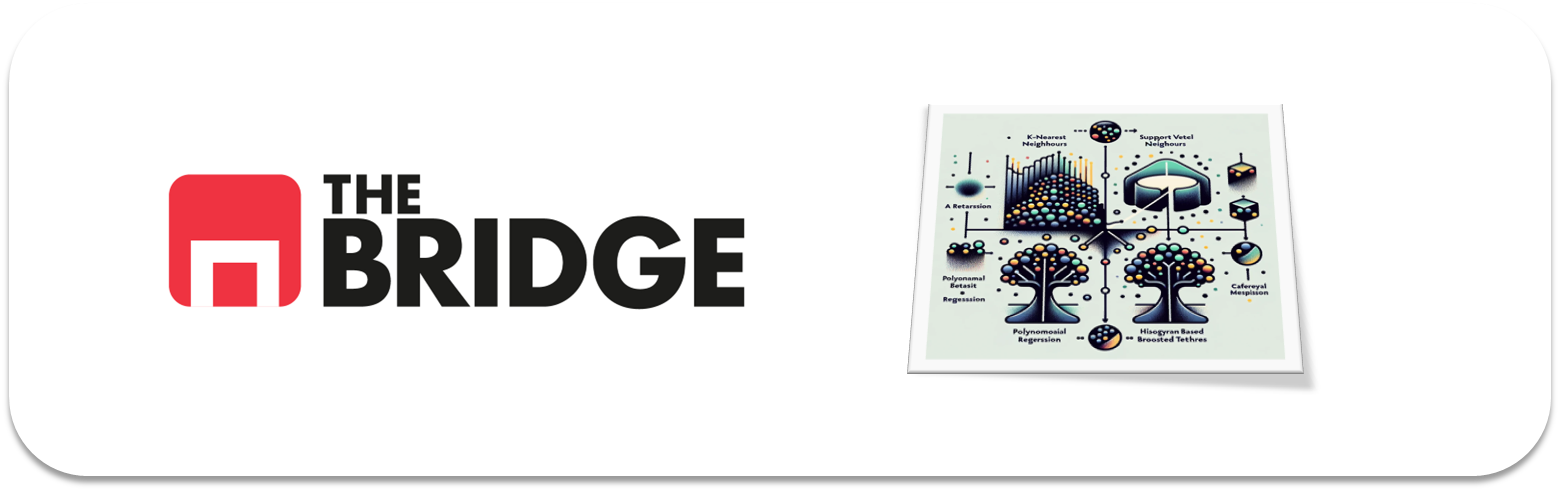

## PRACTICA OBLIGATORIA: **Otros Modelos Supervisados**

* La práctica obligatoria de esta unidad consiste en resolver un modelado de clasificación, incluyendo KNN entre los posibles modelos, y aplicando balanceado. Para ello utilizaremos un dataset que ya hemos empleado en los workout. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample
from xgboost import XGBClassifier


### #1. El problema y los datos

Vamos a volver al dataset con el que vimos la clasificación binaria con regresión logística, "Give me some credit", y nuestro objetivo es crear un modelo que nos permita predicir si una persona va a encontrarse en dificultades financieras en los dos próximos años. El dataset de partida lo puedes en contrar en el directorio data que acompaña al ejercicio. 

### #1.1
Cárgalo y, apoyándote en las herramientas y fuentes que consideres necesarias, haz una descripción textual de sus variables. Luego con ayuda de los datos, haz una clasificación inicial de sus variables en categóricas y numéricas.

In [2]:
df = pd.read_csv("./data/credit_npo.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [4]:
df.sample(5)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
10536,0,0.000000,47,0,0.261520,5750.0,6,0,2,0,3.0
1919,0,0.060219,40,2,0.589344,7000.0,11,0,2,0,2.0
78,0,0.345820,34,1,0.018349,20000.0,4,0,0,0,0.0
5027,1,0.066886,39,1,0.191606,5646.0,7,0,1,0,3.0
9883,0,0.086378,68,0,0.215851,6800.0,11,0,1,0,1.0


In [5]:
for col in df.columns:
    print(df[col].nunique())

2
10764
78
10
11547
4167
43
13
16
8
10


In [6]:
for col in df.columns:
    print(df[col].value_counts(dropna = False),"\n")

SeriousDlqin2yrs
0    11673
1      864
Name: count, dtype: int64 

RevolvingUtilizationOfUnsecuredLines
0.000000    878
1.000000    875
0.035839      2
0.953488      2
1.086379      2
           ... 
0.860370      1
0.245543      1
0.068484      1
0.161741      1
0.116165      1
Name: count, Length: 10764, dtype: int64 

age
47     347
49     325
48     324
50     304
53     302
      ... 
95       7
94       3
97       1
96       1
101      1
Name: count, Length: 78, dtype: int64 

NumberOfTime30-59DaysPastDueNotWorse
0     10500
1      1377
2       401
3       128
4        64
5        23
98       21
6        20
8         2
7         1
Name: count, dtype: int64 

DebtRatio
0.000000    430
4.000000     24
1.000000     19
2.000000     17
3.000000     16
           ... 
0.095587      1
0.409161      1
0.427697      1
0.527330      1
0.493306      1
Name: count, Length: 11547, dtype: int64 

MonthlyIncome
NaN        721
5000.0     275
4000.0     201
6000.0     186
3000.0     182
         

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,12537.0,0.068916,0.253321,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,12537.0,0.330359,0.368148,0.0,0.030651,0.163490,0.582219,6.0
age,12537.0,52.079445,15.077498,21.0,41.000000,51.000000,62.000000,101.0
NumberOfTime30-59DaysPastDueNotWorse,12537.0,0.409588,4.055787,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,12537.0,1.902253,9.122216,0.0,0.142268,0.302025,0.506725,99.0
MonthlyIncome,11816.0,6864.815420,11855.905437,0.0,3498.750000,5416.000000,8300.000000,702500.0
NumberOfOpenCreditLinesAndLoans,12537.0,8.482332,5.165422,0.0,5.000000,8.000000,11.000000,49.0
NumberOfTimes90DaysLate,12537.0,0.259312,4.035658,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,12537.0,0.999202,1.134325,0.0,0.000000,1.000000,2.000000,19.0
NumberOfTime60-89DaysPastDueNotWorse,12537.0,0.228364,4.018873,0.0,0.000000,0.000000,0.000000,98.0


<H2><p style="text-align:center;"><b>Descripción de las variables</b></p></H2>

| Nombre | Tipo | Descripción |
|----------|----------|----------|
| **SeriousDlqin2yrs** | *int64* | Variable **binaria (0-1)** que indica si el titular ha tenido demoras en el pago de sus obligaciones en los dos últimos años. |
| **RevolvingUtilizationOfUnsecuredLines** | *float64* | Numérica continua que contiene el resultado de dividir el importe de los créditos del titular entre su límite de crédito. |
| **age** | *int64* | Numérica discreta con la edad del titular. |
| **NumberOfTime30-59DaysPastDueNotWorse** | *int64* | Número de veces que el titular ha caido en un impago de un máximo de dos meses. Se encuentran valores **entre 0 y 8**, más un valor límite de **98**. |
| **DebtRatio** | *float64* | Numérica continua que indica un valor resultado de dividir los pagos mensuales entre el ingreso mensual del titular. |
| **MonthlyIncome** | *float64* | Ingresos mensuales del titular. |
| **NumberOfOpenCreditLinesAndLoans** | *int64* | Número de líneas de crédito y préstamos abiertos. Se encuentran valores **entre 0 y 50**. |
| **NumberOfTimes90DaysLate** | *int64* | Número de veces en que el titular ha incumplido pagos con una demora superior a los tres meses. Se encuentran valores **entre 0 y 13**, más un valor límite de **98**. |
| **NumberRealEstateLoansOrLines** | *int64* | Cantidad de créditos hipotecarios. Se encuentran valores **entre 0 y 19**. |
| **NumberOfTime60-89DaysPastDueNotWorse** | *int64* | Número de veces que el titular ha caido en un impago de entre dos y tres meses. Se encuentran valores **entre 0 y 11**, más un valor límite de **98**.  |
| **NumberOfDependents** | *float64* | Número de personas dependientes económicamente del titular (niños, ancianos, otros). Se encuentran valores **entre 0 y 10**. |

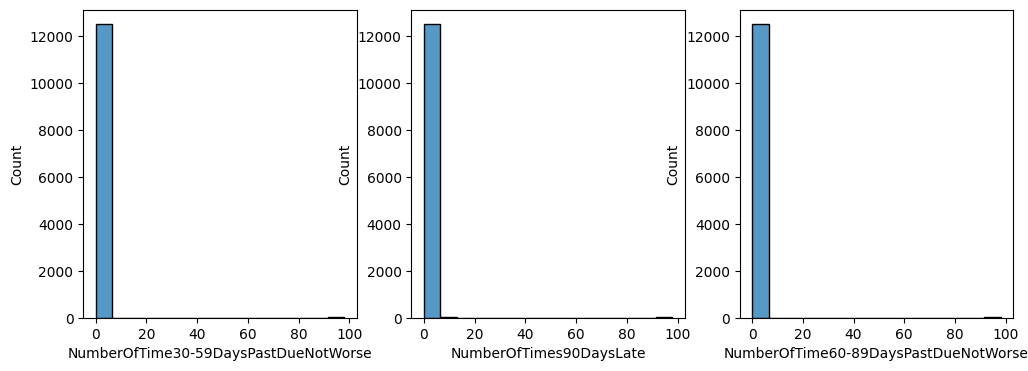

In [8]:
# Reviso las tres variables con valores en 98
fig, axs = plt.subplots(1,3, figsize = (12,4))
sns.histplot(df["NumberOfTime30-59DaysPastDueNotWorse"], ax = axs[0]);
sns.histplot(df["NumberOfTimes90DaysLate"], ax = axs[1]);
sns.histplot(df["NumberOfTime60-89DaysPastDueNotWorse"], ax = axs[2]);

In [9]:
print(df.loc[df["NumberOfTime30-59DaysPastDueNotWorse"]==98]["age"].count())
print(df.loc[df["NumberOfTimes90DaysLate"]==98]["age"].count())
print(df.loc[df["NumberOfTime60-89DaysPastDueNotWorse"]==98]["age"].count())

21
21
21


In [10]:
print(df.loc[(df["NumberOfTime30-59DaysPastDueNotWorse"] == 98)&(df["NumberOfTimes90DaysLate"] == 98)&(df["NumberOfTime60-89DaysPastDueNotWorse"] == 98)]["age"].count())
df.loc[(df["NumberOfTime30-59DaysPastDueNotWorse"] == 98)&(df["NumberOfTimes90DaysLate"] == 98)&(df["NumberOfTime60-89DaysPastDueNotWorse"] == 98)]

21


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
32,1,1.0,43,98,96.000000,NaN,0,98,0,98,0.0
74,0,1.0,26,98,0.000000,NaN,0,98,0,98,0.0
483,1,1.0,44,98,0.037367,2916.0,0,98,0,98,2.0
524,0,1.0,29,98,0.000000,NaN,0,98,0,98,0.0
1123,1,1.0,25,98,54.000000,NaN,0,98,0,98,0.0
1182,0,1.0,25,98,0.020344,1916.0,0,98,0,98,0.0
3803,1,1.0,25,98,0.000000,640.0,0,98,0,98,0.0
4232,0,1.0,28,98,0.000000,NaN,0,98,0,98,NaN
4312,0,1.0,22,98,0.000000,NaN,0,98,0,98,NaN
4722,1,1.0,51,98,0.000000,7500.0,0,98,0,98,0.0


In [11]:
# Elimino las lineas que contienen esos valores
df.drop(df[(df["NumberOfTime30-59DaysPastDueNotWorse"] == 98)&(df["NumberOfTimes90DaysLate"] == 98)&(df["NumberOfTime60-89DaysPastDueNotWorse"] == 98)].index, inplace = True)

In [12]:
# Elimino los NaN
df.dropna(inplace = True)

In [13]:
# División de features en categóricas y numéricas
features = df.columns.tolist()
feat_cat = [] # Lista de variables categóricas
feat_num = [] # Lista de variables numéricas
for col in features:
    cardinalidad = (len(df[col].unique())/len(df))*100
    if cardinalidad < 1:
        feat_cat.append(col)
    else:
        feat_num.append(col)

### #1.2
¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?

<div style="background-color: SeaShell;">
    
#### Problema de negocio  
---
Predecir si una persona va a encontrarse en dificultades financieras en los dos próximos años.

#### Problema técnico  
---
Construir un modelo que pueda efectuar la predicción requerida con una fiabilidad aceptable.
El problema es de tipo supervisado (se conoce la variable objetivo) y de clasificación (se debe determinar el grupo al que pertenecerá según la predicción).

#### Variable objetivo (target)  
---
En este caso, la variable objetivo es la columna **'SeriousDlqin2yrs'**, que divide a los clientes en dos grupos;  
0 - Clientes CON incidencias de impago en sus créditos.  
1 - Clientes SIN incidencias de impago en sus créditos.

</div>

### #1.3
Pinta la distribución de frecuencias del target y coméntala

In [14]:
target = "SeriousDlqin2yrs"
features.remove("SeriousDlqin2yrs")
feat_cat.remove(target)

In [15]:
print(target)
print(len(feat_cat),"\n",feat_cat)
print(len(feat_num),"\n",feat_num)

SeriousDlqin2yrs
7 
 ['age', 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']
3 
 ['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome']


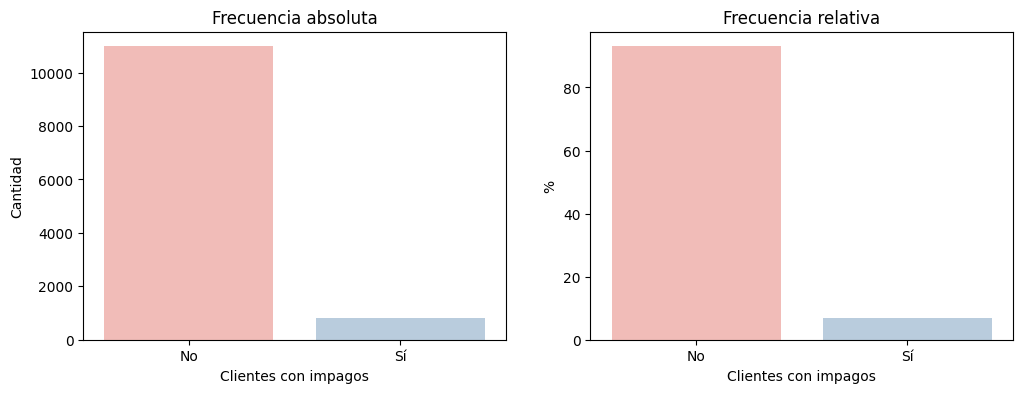

In [16]:
fig, axs = plt.subplots(1,2, figsize=(12,4))

valores = df.SeriousDlqin2yrs.value_counts()
sns.barplot(x = valores.index, y = valores.values, hue = valores.index, ax = axs[0], palette = "Pastel1", legend = False)
axs[0].set_xlabel("Clientes con impagos")
axs[0].set_ylabel("Cantidad")
axs[0].set_xticks([0,1])
axs[0].set_xticklabels(["No","Sí"])
axs[0].set_title("Frecuencia absoluta");

valores = df.SeriousDlqin2yrs.value_counts(normalize = True) * 100
sns.barplot(x = valores.index, y = valores.values, hue = valores.index, ax = axs[1], palette = "Pastel1", legend = False)
axs[1].set_xlabel("Clientes con impagos")
axs[1].set_ylabel("%")
axs[1].set_xticks([0,1])
axs[1].set_xticklabels(["No","Sí"])
axs[1].set_title("Frecuencia relativa");

In [17]:
# Compruebo los porcentajes de 0 y 1, para tener en cuenta sus valores en la evaluación de los modelos.
per0 = df.loc[df.SeriousDlqin2yrs == 0]["SeriousDlqin2yrs"].count() / len(df.SeriousDlqin2yrs)
per1 = df.loc[df.SeriousDlqin2yrs == 1]["SeriousDlqin2yrs"].count() / len(df.SeriousDlqin2yrs)
print(f"Los clientes SIN riesgo de impago son un {round((per0*100),2)}% del total de clientes ({len(df.SeriousDlqin2yrs)}).")
print(f"Los clientes CON riesgo de impago son un {round((per1*100),2)}% del total de clientes ({len(df.SeriousDlqin2yrs)}).")

Los clientes SIN riesgo de impago son un 93.03% del total de clientes (11806).
Los clientes CON riesgo de impago son un 6.97% del total de clientes (11806).


<div style="background-color: SeaShell;">
    
#### Distribución de valores del target  
---
El target es una variable binaria que indica si un cliente ha tenido algún impago en los dos últimos años, asignando al titular los valores 0 (no ha tenido incidencias) o 1 (sí ha tenido incidencias).  
Los datos se encuentran muy desbalanceados, con muchos registros de clientes sin incidencias y muy pocos registros con clientes con impagos.

</div>

In [18]:
# Echo un vistazo a la relación entre las variables
np.abs(df.corr()[target]).sort_values(ascending = False)

SeriousDlqin2yrs                        1.000000
NumberOfTimes90DaysLate                 0.349945
RevolvingUtilizationOfUnsecuredLines    0.278037
NumberOfTime30-59DaysPastDueNotWorse    0.258165
NumberOfTime60-89DaysPastDueNotWorse    0.253654
age                                     0.105705
NumberOfDependents                      0.045036
NumberOfOpenCreditLinesAndLoans         0.026145
MonthlyIncome                           0.021481
NumberRealEstateLoansOrLines            0.003274
DebtRatio                               0.001288
Name: SeriousDlqin2yrs, dtype: float64

In [19]:
# Hago copia de seguridad
df_imp = df.copy()

In [20]:
# Decido MANTENER las columnas con una correlación con el target por debajo de 0.05 (o mayores a -0.05 si la correlación fuera negativa).
#df_imp = df.drop(columns = ["NumberOfDependents","NumberOfOpenCreditLinesAndLoans","MonthlyIncome","NumberRealEstateLoansOrLines","DebtRatio"])


### #2 Modelado

Realiza un proceso completo de modelado hasta dar con el mejor modelo de los que hayas escogido (emplea al menos 3, y uno tiene que ser KNN). Aplica las técnicas que creas necesarias para obtener el mejor resultado (suponiendo que este después de hablar con el negocio es el recall medio, para tener un compromiso entre las dos clases). Para comparar modelos emplea validación cruzada antes de optimización y luego ajusta los hiperparámetros del mejor modelo. Evalúa este y haz un pequeño análisis de errores.

In [21]:
# Divido el dataset en los conjuntos de train y test, manteniendo la misma proporción del target.
#train_set, test_set = train_test_split(df_imp, test_size = 0.2, stratify = df_imp["SeriousDlqin2yrs"], random_state = 42)
train_set, test_set = train_test_split(df_imp, test_size = 0.2, random_state = 42)

In [22]:
# Separo el target del resto de features en ambos casos.
X_train = train_set.copy()
X_train.drop(columns = "SeriousDlqin2yrs", inplace = True)
y_train = train_set["SeriousDlqin2yrs"]

X_test = test_set.copy()
X_test.drop(columns = "SeriousDlqin2yrs", inplace = True)
y_test = test_set["SeriousDlqin2yrs"]

In [23]:
# Aplico una escala a la variable 'MonthlyIncome'.
scaler = MinMaxScaler()
X_train.MonthlyIncome = scaler.fit_transform(X_train[["MonthlyIncome"]]) # Para train
X_test.MonthlyIncome = scaler.fit_transform(X_test[["MonthlyIncome"]]) # Para test

#### Regresión Logística

In [24]:
log_reg = LogisticRegression(max_iter = 10000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [25]:
print(classification_report(y_train, log_reg.predict(X_train)))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      8808
           1       0.60      0.17      0.27       636

    accuracy                           0.94      9444
   macro avg       0.77      0.58      0.62      9444
weighted avg       0.92      0.94      0.92      9444



In [26]:
# Validación cruzada
scores = cross_val_score(log_reg, X_train, y_train, scoring = "balanced_accuracy", cv = 10)
print(scores)
print('average score: {}'.format(scores.mean()))

[0.58750709 0.59091232 0.59034478 0.56236698 0.58503144 0.57652739
 0.58332883 0.56065438 0.62045455 0.55014205]
average score: 0.580726980564523


In [27]:
# Predicción con Regresión Logística
prediccionLR = log_reg.predict(X_test)
print(classification_report(y_test, prediccionLR))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2175
           1       0.72      0.17      0.27       187

    accuracy                           0.93      2362
   macro avg       0.83      0.58      0.62      2362
weighted avg       0.92      0.93      0.91      2362



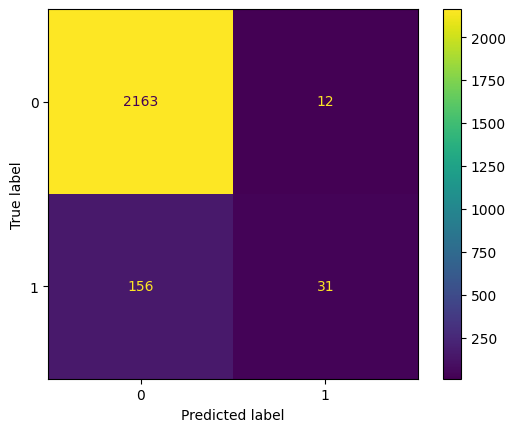

In [28]:
ConfusionMatrixDisplay.from_predictions(y_test, prediccionLR);

#### Gradient Boost Classifier


In [29]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [30]:
# Validación cruzada
scores = cross_val_score(gbc, X_train, y_train, scoring = "balanced_accuracy", cv = 10)
print(scores)
print('average score: {}'.format(scores.mean()))

[0.57912706 0.59758974 0.62543452 0.55398695 0.59749923 0.59920184
 0.59863431 0.56632074 0.60369318 0.54005682]
average score: 0.5861544392870655


In [31]:
# Predicción con Gradient Boost Classifier
prediccionGBC = gbc.predict(X_test)
print(classification_report(y_test,prediccionGBC))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2175
           1       0.60      0.18      0.28       187

    accuracy                           0.93      2362
   macro avg       0.77      0.59      0.62      2362
weighted avg       0.91      0.93      0.91      2362



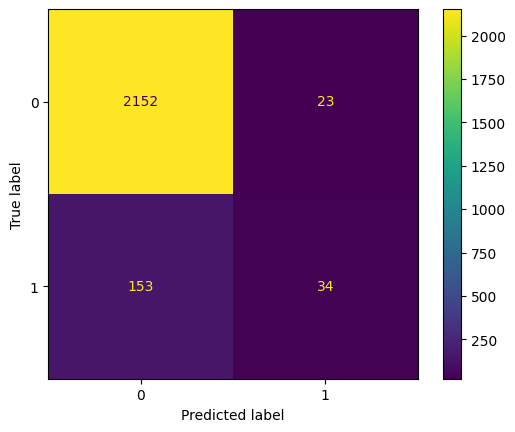

In [32]:
ConfusionMatrixDisplay.from_predictions(y_test, prediccionGBC);

#### KNN


In [33]:
knn = KNeighborsClassifier(n_neighbors = 50)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=50)

In [34]:
print(classification_report(y_train, knn.predict(X_train)))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97      8808
           1       0.75      0.00      0.01       636

    accuracy                           0.93      9444
   macro avg       0.84      0.50      0.49      9444
weighted avg       0.92      0.93      0.90      9444



In [35]:
# Validación cruzada
scores = cross_val_score(knn, X_train, y_train, scoring = "balanced_accuracy", cv = 10)
print(scores)
print('average score: {}'.format(scores.mean()))

[0.5        0.5        0.5        0.5        0.5        0.50793651
 0.50793651 0.5        0.5        0.5       ]
average score: 0.5015873015873016


In [36]:
# Predicción con KNN
prediccionKNN = knn.predict(X_test)
print(classification_report(y_test, prediccionKNN))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2175
           1       0.00      0.00      0.00       187

    accuracy                           0.92      2362
   macro avg       0.46      0.50      0.48      2362
weighted avg       0.85      0.92      0.88      2362



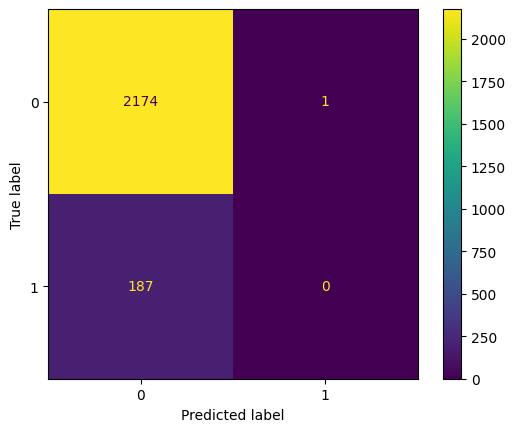

In [37]:
ConfusionMatrixDisplay.from_predictions(y_test, prediccionKNN);

<div style="background-color: SeaShell;">
    
#### Primeras conclusiones  
---
Como el dataset está muy desbalanceado, todos los modelos rondan 0.93 de Accuracy, que se corresponde con el desbalance de los datos. Es decir, dan a todos los valores de test un resultado de 0, que deriva en un 93% de acierto como se ha comprobado anteriormente.

Hay que balancear los datos para crear un buen modelo. En este caso, como se cuenta con una gran cantidad de registros, he optado por aplicar un **Under-Sampling**. 

</div>

In [38]:
# Igualo el número de registros con valores 0 y 1 en la variable target.
df_may = X_train[y_train == 0]
df_min = X_train[y_train == 1]
df_mayf = resample(df_may, replace = False, n_samples = len(df_min), random_state = 42)
X_trainf = pd.concat([df_min, df_mayf])
y_trainf = pd.concat([y_train.loc[df_mayf.index], y_train.loc[df_min.index]])

In [39]:
y_trainf.value_counts()

SeriousDlqin2yrs
0    636
1    636
Name: count, dtype: int64

#### Gradient Boost Classifier


In [40]:
gbcb = GradientBoostingClassifier(n_estimators = 1000)
gbcb.fit(X_trainf, y_trainf)

GradientBoostingClassifier(n_estimators=1000)

In [41]:
# Validación cruzada
scores = cross_val_score(gbcb, X_trainf, y_trainf, scoring = "balanced_accuracy", cv = 10)
print(scores)
print('average score: {}'.format(scores.mean()))

[0.78125    0.7578125  0.81907242 0.7250744  0.7485119  0.8265129
 0.71639385 0.71589782 0.73251488 0.69320437]
average score: 0.751624503968254


In [42]:
# Predicción con Gradient Boost Classifier
prediccionGBC_bal = gbcb.predict(X_test)
print(classification_report(y_test,prediccionGBC_bal))

              precision    recall  f1-score   support

           0       0.79      0.23      0.36      2175
           1       0.03      0.29      0.06       187

    accuracy                           0.24      2362
   macro avg       0.41      0.26      0.21      2362
weighted avg       0.73      0.24      0.34      2362



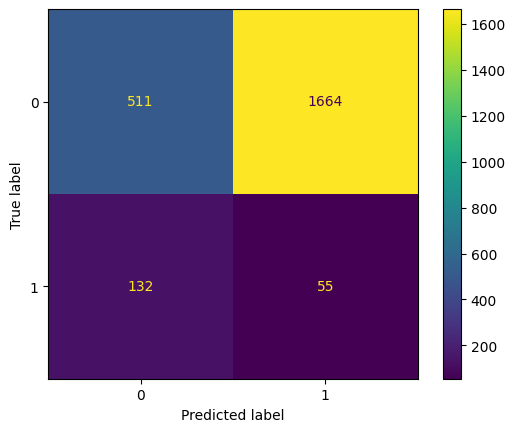

In [43]:
ConfusionMatrixDisplay.from_predictions(y_test, prediccionGBC_bal);

<div style="background-color: SeaShell;">
    
#### Otros métodos de balance de datos  
---
Balancear mediante el hiperparámetro **class_weight**.  
Balancear mediante el método de **Over-Sampling (SMOTE)**.

</div>

#### Regresión Logística

In [44]:
log_regb = LogisticRegression(class_weight = "balanced", max_iter = 10000)
log_regb.fit(X_trainf, y_trainf)

LogisticRegression(class_weight='balanced', max_iter=10000)

In [45]:
# Validación cruzada
scores = cross_val_score(log_regb, X_trainf, y_trainf, scoring = "balanced_accuracy", cv = 10)
print(scores)
print('average score: {}'.format(scores.mean()))

[0.78125    0.796875   0.81919643 0.78025794 0.78782242 0.83469742
 0.7952629  0.73958333 0.74813988 0.72420635]
average score: 0.7807291666666667


In [46]:
# Predicción con Regresión Logística
prediccionLR_bal = log_regb.predict(X_test)
print(classification_report(y_test, prediccionLR_bal))

              precision    recall  f1-score   support

           0       0.75      0.19      0.30      2175
           1       0.03      0.27      0.05       187

    accuracy                           0.20      2362
   macro avg       0.39      0.23      0.18      2362
weighted avg       0.69      0.20      0.28      2362



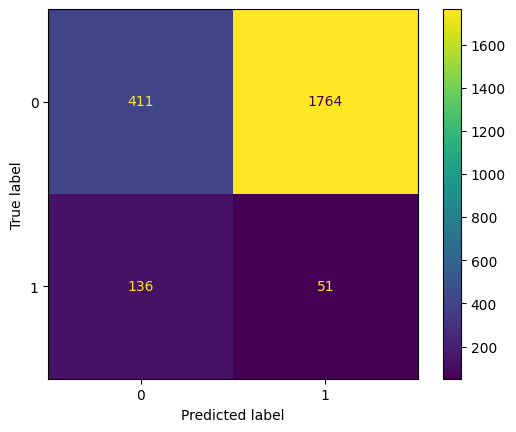

In [47]:
ConfusionMatrixDisplay.from_predictions(y_test, prediccionLR_bal);

In [48]:
# Aplico SMOTE
smote = SMOTE(random_state = 42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

#### XGBClassifier

In [49]:
xgbs = XGBClassifier(random_state = 42)
xgbs.fit(X_train_smote, y_train_smote)
prediccionXGB_smo = xgbs.predict(X_test)
print(classification_report(y_test, prediccionXGB_smo))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      2175
           1       0.26      0.41      0.32       187

    accuracy                           0.86      2362
   macro avg       0.60      0.65      0.62      2362
weighted avg       0.89      0.86      0.88      2362



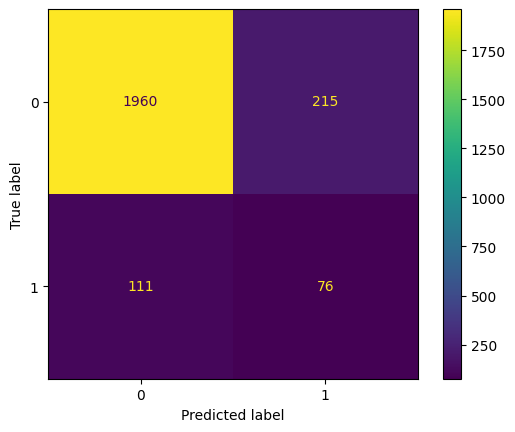

In [50]:
ConfusionMatrixDisplay.from_predictions(y_test, prediccionXGB_smo);

#### Gradient Boost Classifier


In [51]:
gbc_smote = GradientBoostingClassifier(random_state = 42, n_estimators = 10000)
gbc_smote.fit(X_train_smote, y_train_smote)

GradientBoostingClassifier(n_estimators=10000, random_state=42)

In [52]:
# Validación cruzada
scores = cross_val_score(gbc_smote, X_train_smote, y_train_smote, scoring = "balanced_accuracy", cv = 5)
print(scores)
print('average score: {}'.format(scores.mean()))

[0.84194098 0.91484965 0.92194547 0.91654629 0.91228767]
average score: 0.9015140118122442


In [53]:
# Predicción con Gradient Boost Classifier
prediccionGBC_smote = gbc_smote.predict(X_test)
print(classification_report(y_test,prediccionGBC_smote))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91      2175
           1       0.23      0.45      0.31       187

    accuracy                           0.84      2362
   macro avg       0.59      0.66      0.61      2362
weighted avg       0.89      0.84      0.86      2362



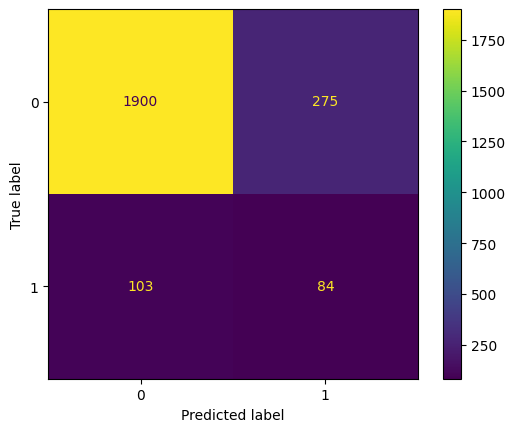

In [54]:
ConfusionMatrixDisplay.from_predictions(y_test, prediccionGBC_smote);

<div style="background-color: SeaShell;">
    
#### Mejores hiperparámetros  
---
Mediante **RandomizedSearchCV** voy a encontrar la mejor combinación de hiperparámetros para el clasificador.

</div>

In [55]:
parametros = {'max_depth': [3, 6, 12],
          'learning_rate': [0.2, 0.5, 1],
          'subsample': [0.2,0.5,1],
          'n_estimators': [100, 500, 1000, 5000, 10000],
          }

clasificador = RandomizedSearchCV(estimator = gbc_smote,
                        cv = 3,
                        n_iter = 10,
                        param_distributions = parametros,
                        scoring = 'balanced_accuracy' 
                        )

clasificador.fit(X_train_smote, y_train_smote)

RandomizedSearchCV(cv=3,
                   estimator=GradientBoostingClassifier(n_estimators=10000,
                                                        random_state=42),
                   param_distributions={'learning_rate': [0.2, 0.5, 1],
                                        'max_depth': [3, 6, 12],
                                        'n_estimators': [100, 500, 1000, 5000,
                                                         10000],
                                        'subsample': [0.2, 0.5, 1]},
                   scoring='balanced_accuracy')

In [56]:
clasificador.best_params_

{'subsample': 1, 'n_estimators': 10000, 'max_depth': 12, 'learning_rate': 1}

In [57]:
# Predicción con Gradient Boost Classifier tras optimizar hiperparámetros
prediccionFinal = clasificador.predict(X_test)
print(classification_report(y_test,prediccionFinal))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      2175
           1       0.26      0.29      0.27       187

    accuracy                           0.88      2362
   macro avg       0.60      0.61      0.60      2362
weighted avg       0.88      0.88      0.88      2362



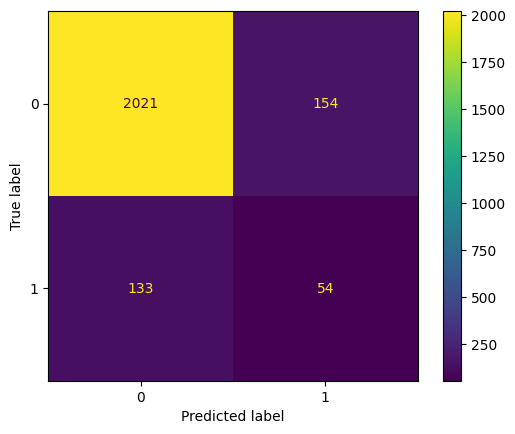

In [58]:
ConfusionMatrixDisplay.from_predictions(y_test, prediccionFinal);

In [59]:
parametros2 = {'max_depth': [3, 6, 12],
          'learning_rate': [0.2, 0.5, 1],
          'subsample': [0.2,0.5,1],
          'n_estimators': [100, 500, 1000, 5000],
          }

clasificador2 = RandomizedSearchCV(estimator = gbc_smote,
                        cv = 3,
                        n_iter = 10,
                        param_distributions = parametros2,
                        scoring = 'f1_micro' 
                        )

clasificador2.fit(X_train_smote, y_train_smote)

RandomizedSearchCV(cv=3,
                   estimator=GradientBoostingClassifier(n_estimators=10000,
                                                        random_state=42),
                   param_distributions={'learning_rate': [0.2, 0.5, 1],
                                        'max_depth': [3, 6, 12],
                                        'n_estimators': [100, 500, 1000, 5000],
                                        'subsample': [0.2, 0.5, 1]},
                   scoring='f1_micro')

In [60]:
# Predicción con Gradient Boost Classifier tras optimizar hiperparámetros
prediccionFinal2 = clasificador2.predict(X_test)
print(classification_report(y_test,prediccionFinal2))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      2175
           1       0.26      0.29      0.27       187

    accuracy                           0.88      2362
   macro avg       0.60      0.61      0.60      2362
weighted avg       0.88      0.88      0.88      2362



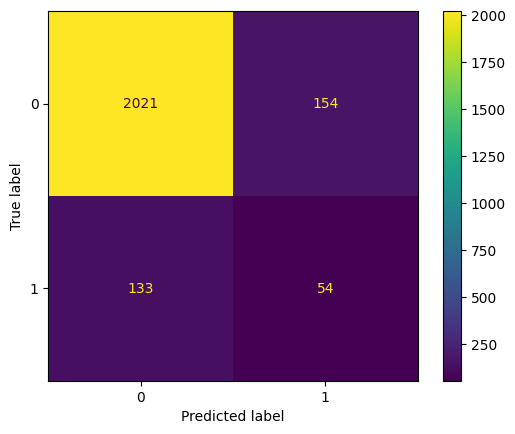

In [61]:
ConfusionMatrixDisplay.from_predictions(y_test, prediccionFinal2);